## Integrantes

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from scipy.stats import mstats
import warnings; warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)
sns.set_theme()


In [54]:
file_name = 'diabetes_proyecto.csv'
df = pd.read_csv(file_name)

# EDA

In [55]:

print("Forma del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes.value_counts())

display(df.head(3))
print("\n.info():")
df.info()

# Columnas numéricas y categóricas
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(f"\nNuméricas ({len(num_cols)}):", num_cols[:20], "..." if len(num_cols)>20 else "")
print(f"Categóricas ({len(cat_cols)}):", cat_cols[:20], "..." if len(cat_cols)>20 else "")


Forma del dataset: (144641, 14)

Tipos de datos:
 int64      5
float64    5
object     4
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Lifestyle,DietType,SmokingStatus,FamilyHistory,StressLevel
0,6,148.0,72,35,0.0,33.6,0.627,50,1,Active,Balanced,Non-Smoker,Yes,8.29
1,1,85.0,66,29,0.0,26.6,0.351,31,0,Active,Balanced,Smoker,No,3.59
2,8,183.0,64,0,0.0,23.3,0.672,32,1,Sedentary,Balanced,Non-Smoker,Yes,1.73



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144641 entries, 0 to 144640
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               144641 non-null  int64  
 1   Glucose                   140290 non-null  float64
 2   BloodPressure             144641 non-null  int64  
 3   SkinThickness             144641 non-null  int64  
 4   Insulin                   143200 non-null  float64
 5   BMI                       144641 non-null  float64
 6   DiabetesPedigreeFunction  144641 non-null  float64
 7   Age                       144641 non-null  int64  
 8   Outcome                   144641 non-null  int64  
 9   Lifestyle                 144641 non-null  object 
 10  DietType                  144640 non-null  object 
 11  SmokingStatus             144640 non-null  object 
 12  FamilyHistory             144640 non-null  object 
 13  StressLevel               137381 n

In [56]:

nulos = df.isna().sum().sort_values(ascending=False)
pct_nulos = (df.isna().mean()*100).sort_values(ascending=False)
nul_table = pd.DataFrame({"nulos": nulos, "%nulos": pct_nulos})
display(nul_table[nul_table["nulos"]>0])

dup_count = df.duplicated().sum()
print(f"\nFilas duplicadas: {dup_count}")


,nulos,%nulos
StressLevel,7260,5.019324
Glucose,4351,3.008137
Insulin,1441,0.996260
DietType,1,0.000691
SmokingStatus,1,0.000691
FamilyHistory,1,0.000691



Filas duplicadas: 1237


In [57]:

if num_cols:
    display(df[num_cols].describe().T.assign(iqr=lambda d: d["75%"]-d["25%"]))
if cat_cols:
    display(df[cat_cols].describe(include="all").T)


,count,mean,std,min,25%,50%,75%,max,iqr
Pregnancies,144641.0,3.837702,3.366041,0.000,1.000,3.000,6.000,17.00,5.000
Glucose,140290.0,120.966562,32.086517,0.000,99.000,117.000,141.000,199.00,42.000
BloodPressure,144641.0,69.132452,19.260695,0.000,62.000,72.000,80.000,122.00,18.000
SkinThickness,144641.0,20.559800,15.983580,0.000,0.000,23.000,32.000,99.00,32.000
Insulin,143200.0,80.047989,115.875462,0.000,0.000,29.000,128.000,846.00,128.000
BMI,144641.0,32.003075,7.902904,0.000,27.300,32.000,36.600,67.10,9.300
DiabetesPedigreeFunction,144641.0,0.473241,0.332653,0.078,0.244,0.375,0.629,2.42,0.385
Age,144641.0,33.248906,11.736519,21.000,24.000,29.000,41.000,81.00,17.000
Outcome,144641.0,0.200324,0.400244,0.000,0.000,0.000,0.000,1.00,0.000
StressLevel,137381.0,4.999093,1.997798,-4.580,3.650,5.000,6.350,13.99,2.700


,count,unique,top,freq
Lifestyle,144641,3,Sedentary,72377
DietType,144640,3,LowCarb,48625
SmokingStatus,144640,2,Non-Smoker,72576
FamilyHistory,144640,2,Yes,72537


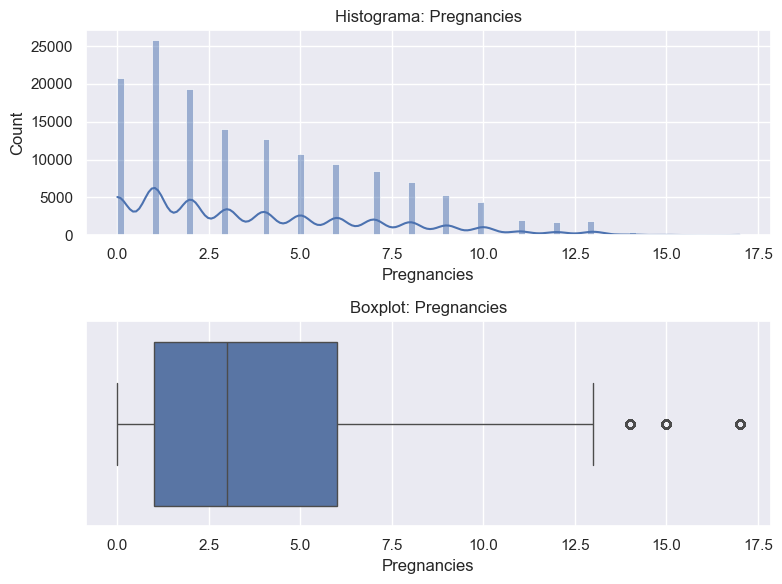

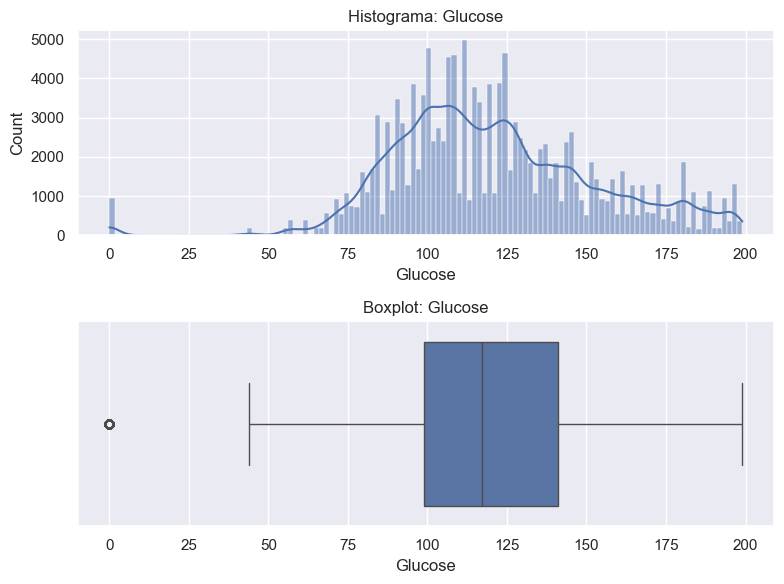

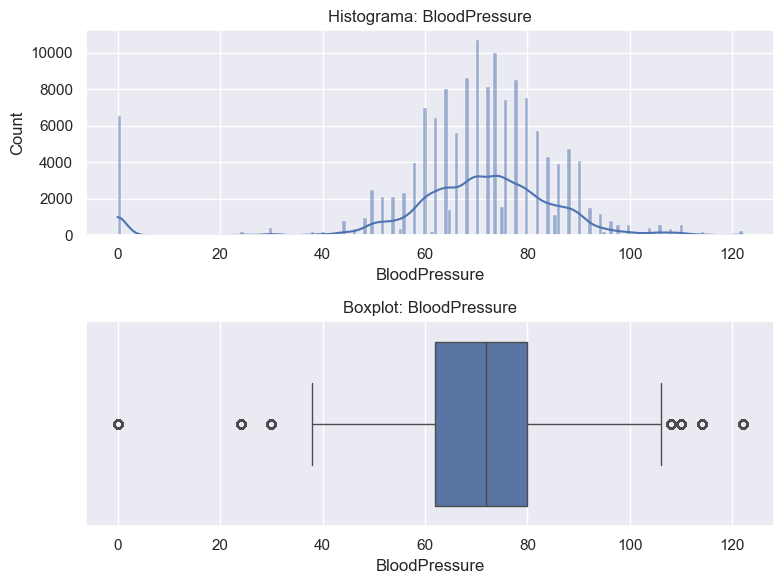

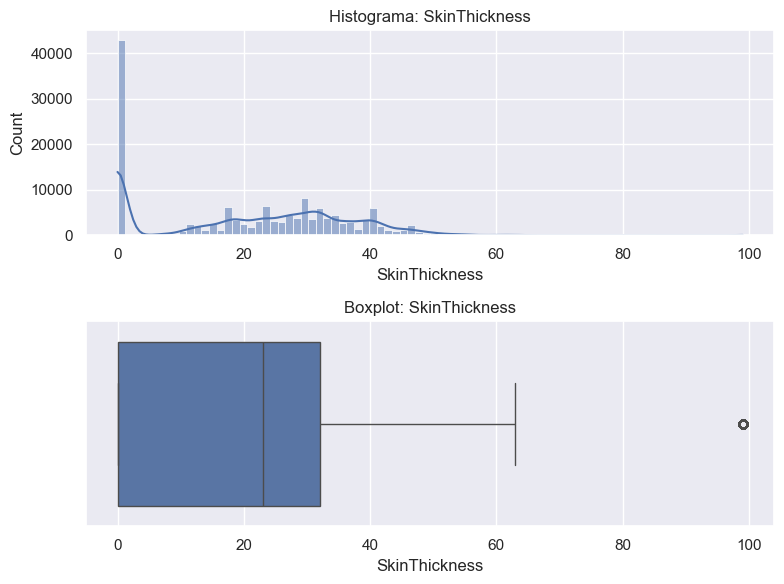

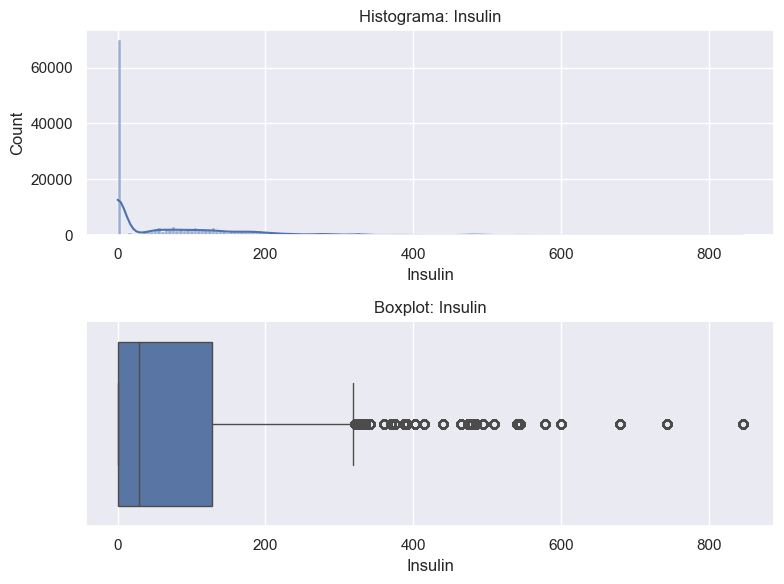

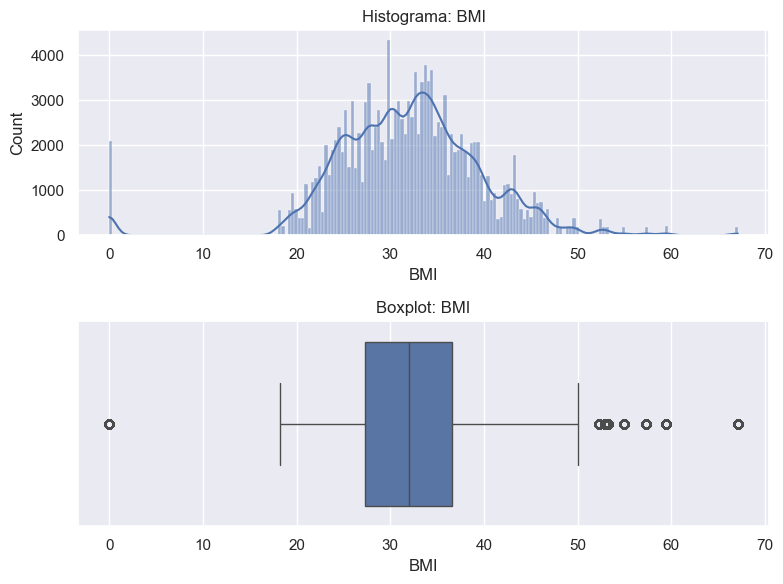

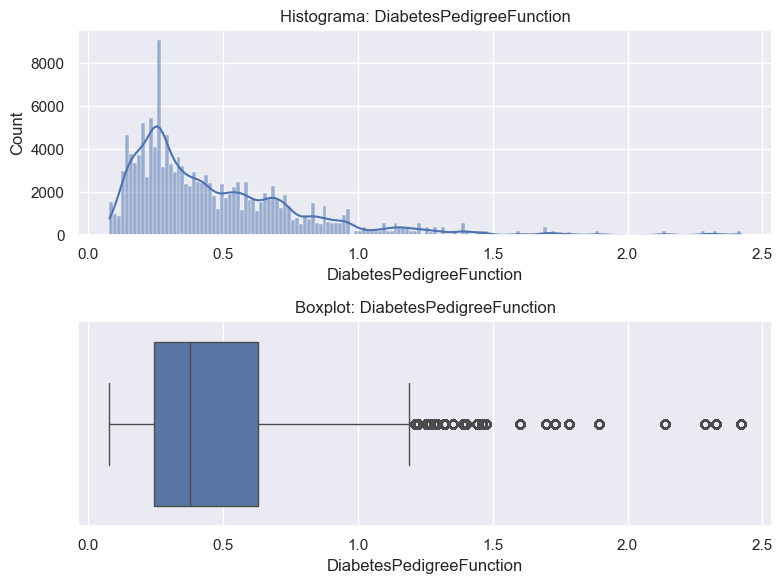

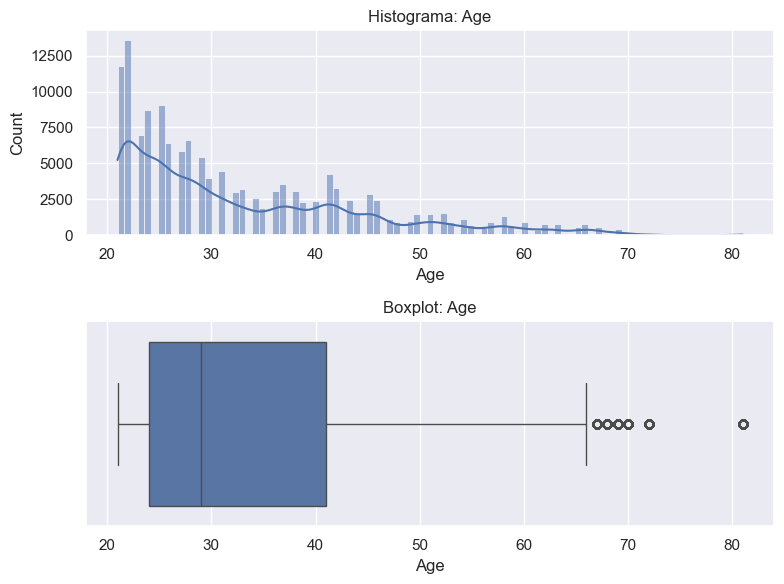

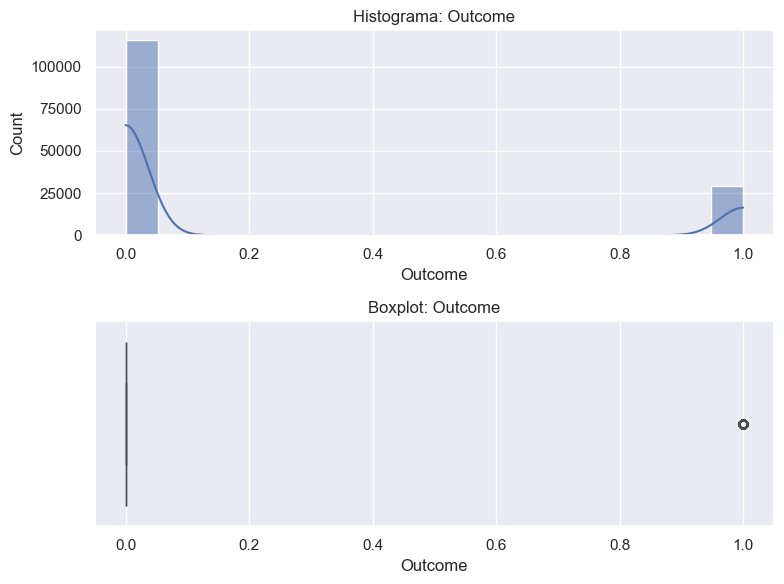

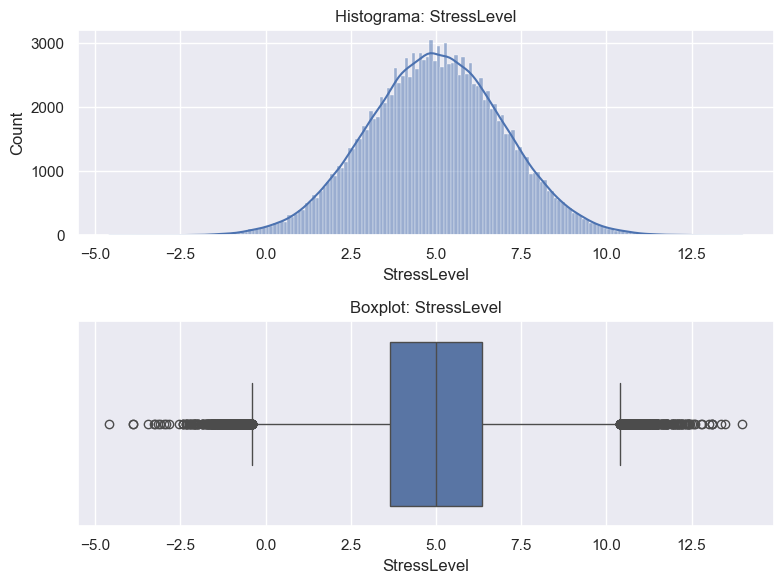

In [58]:

cols = num_cols[:10]  # limita para no saturar el notebook (ajusta si quieres)
for c in cols:
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df[c].dropna(), kde=True, ax=ax[0])
    ax[0].set_title(f"Histograma: {c}")
    sns.boxplot(x=df[c], ax=ax[1])
    ax[1].set_title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()



Lifestyle — cardinalidad: 3


,conteo
Lifestyle,
Sedentary,72377
Active,72263
Seden,1


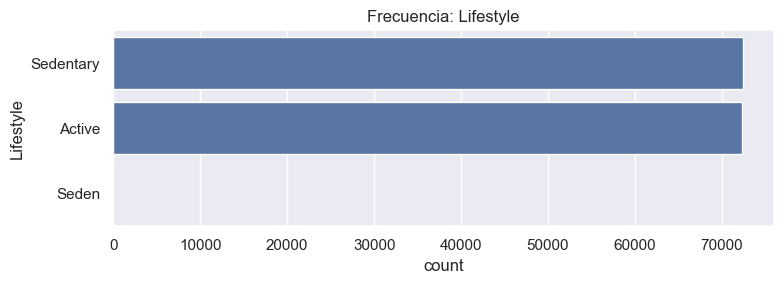


DietType — cardinalidad: 3


,conteo
DietType,
LowCarb,48625
HighCarb,48227
Balanced,47788
NaN,1


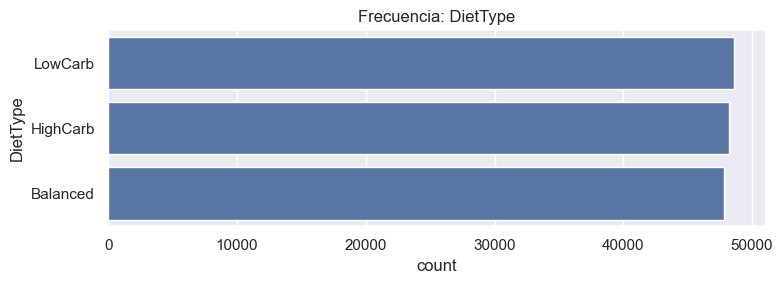


SmokingStatus — cardinalidad: 2


,conteo
SmokingStatus,
Non-Smoker,72576
Smoker,72064
NaN,1


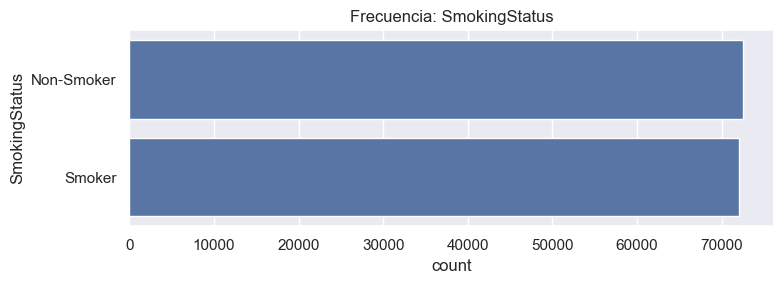


FamilyHistory — cardinalidad: 2


,conteo
FamilyHistory,
Yes,72537
No,72103
NaN,1


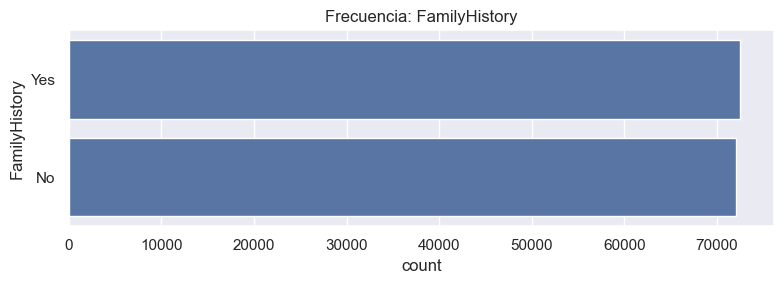

In [59]:

cols = cat_cols[:10]
for c in cols:
    print(f"\n{c} — cardinalidad: {df[c].nunique()}")
    display(df[c].value_counts(dropna=False).to_frame("conteo"))
    plt.figure(figsize=(8,3))
    sns.countplot(y=c, data=df, order=df[c].value_counts().index)
    plt.title(f"Frecuencia: {c}")
    plt.tight_layout()
    plt.show()


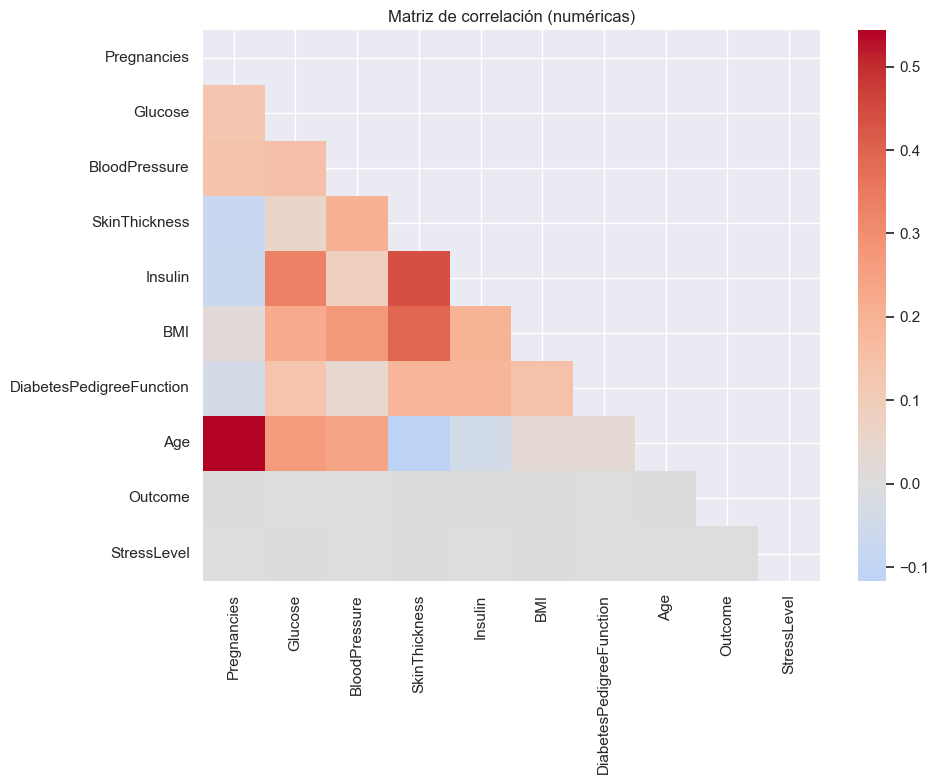


Pares más correlacionados (|r|>0.6):


TypeError: Series.reindex() got an unexpected keyword argument 'key'

In [60]:

if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=False, cmap="coolwarm", center=0)
    plt.title("Matriz de correlación (numéricas)")
    plt.tight_layout()
    plt.show()

    print("\nPares más correlacionados (|r|>0.6):")
    pairs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                 .stack()
                 .rename("r")
                 .reindex(key=lambda s: s.abs().sort_values(ascending=False)))
    display(pairs[abs(pairs)>0.6].to_frame())


# Post Procesamiento

In [36]:
y = df['Outcome']
y.info()
df = pd.concat([df, pd.get_dummies(df['Lifestyle'], dtype=int)], axis=1).drop(columns=['Lifestyle'])
df = pd.concat([df, pd.get_dummies(df['DietType'], dtype=int)], axis=1).drop(columns=['DietType'])
df = pd.concat([df, pd.get_dummies(df['SmokingStatus'], dtype=int)], axis=1).drop(columns=['SmokingStatus'])
df = pd.concat([df, pd.get_dummies(df['FamilyHistory'], dtype=int)], axis=1).drop(columns=['FamilyHistory'])
df.head()


<class 'pandas.core.series.Series'>
RangeIndex: 144641 entries, 0 to 144640
Series name: Outcome
Non-Null Count   Dtype
--------------   -----
144641 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,StressLevel,Active,Seden,Sedentary,Balanced,HighCarb,LowCarb,Non-Smoker,Smoker,No,Yes
0,6,148.0,72,35,0.0,33.6,0.627,50,1,8.29,1,0,0,1,0,0,1,0,0,1
1,1,85.0,66,29,0.0,26.6,0.351,31,0,3.59,1,0,0,1,0,0,0,1,1,0
2,8,183.0,64,0,0.0,23.3,0.672,32,1,1.73,0,0,1,1,0,0,1,0,0,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0,6.22,0,0,1,1,0,0,1,0,1,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1,6.79,1,0,0,0,0,1,1,0,0,1


Resumen inicial (df_proc):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144641 entries, 0 to 144640
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               144641 non-null  int64  
 1   Glucose                   140290 non-null  float64
 2   BloodPressure             144641 non-null  int64  
 3   SkinThickness             144641 non-null  int64  
 4   Insulin                   143200 non-null  float64
 5   BMI                       144641 non-null  float64
 6   DiabetesPedigreeFunction  144641 non-null  float64
 7   Age                       144641 non-null  int64  
 8   Outcome                   144641 non-null  int64  
 9   StressLevel               137381 non-null  float64
 10  Active                    144641 non-null  int32  
 11  Seden                     144641 non-null  int32  
 12  Sedentary                 144641 non-null  int32  
 13  Balanced         

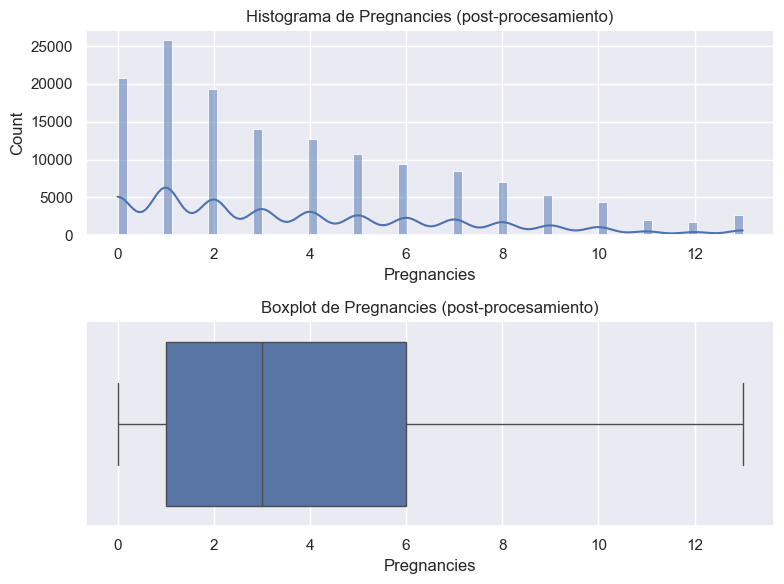

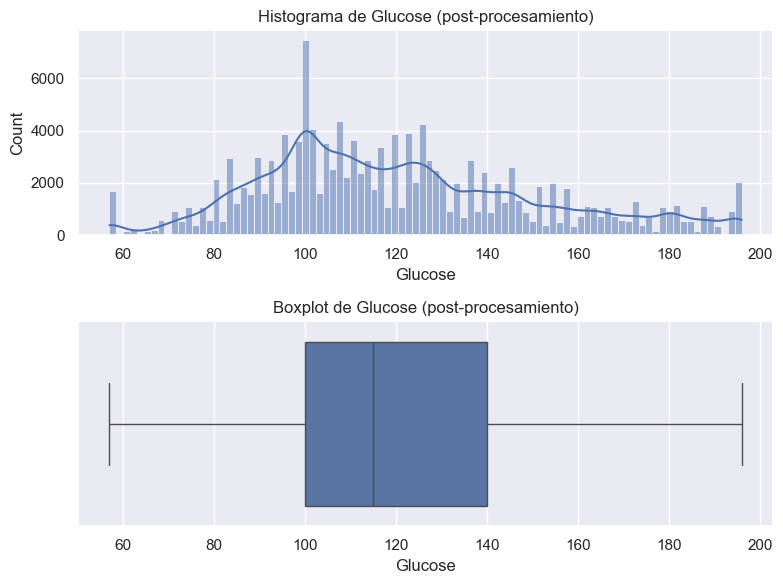

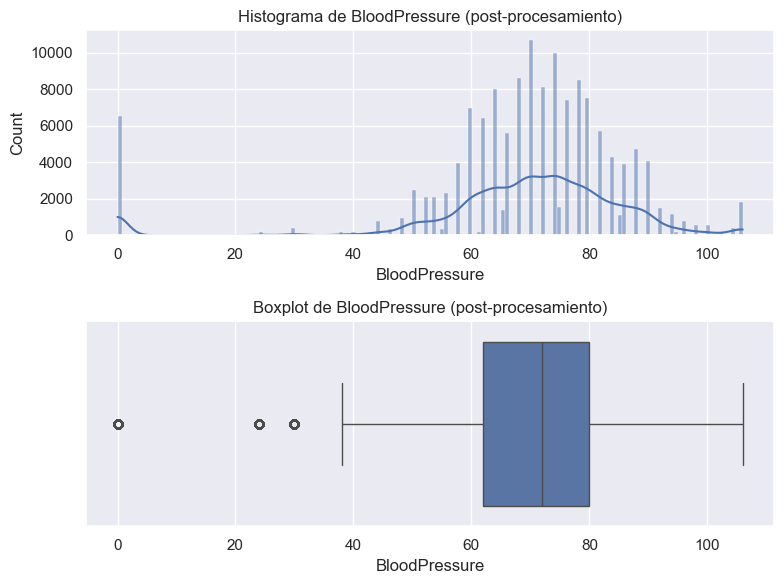

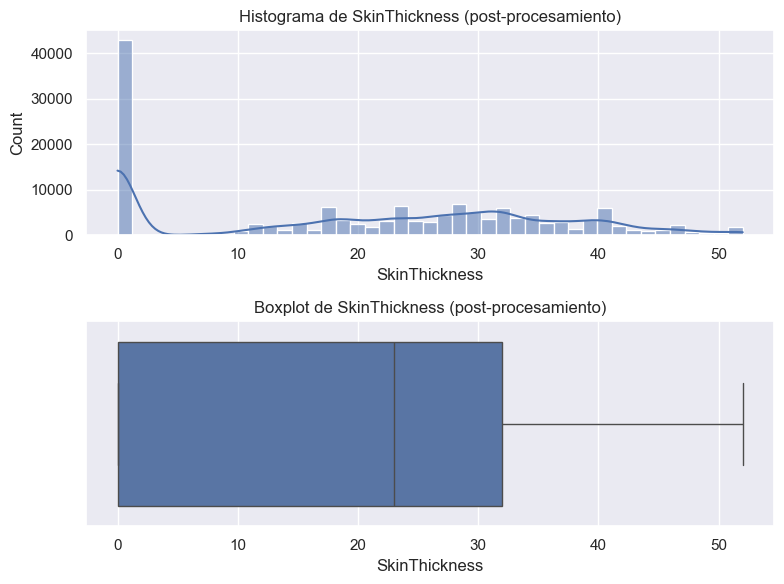

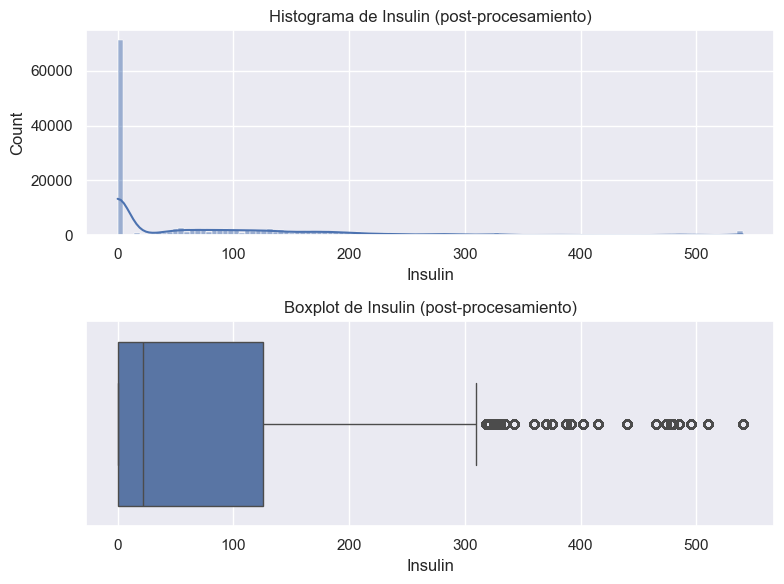

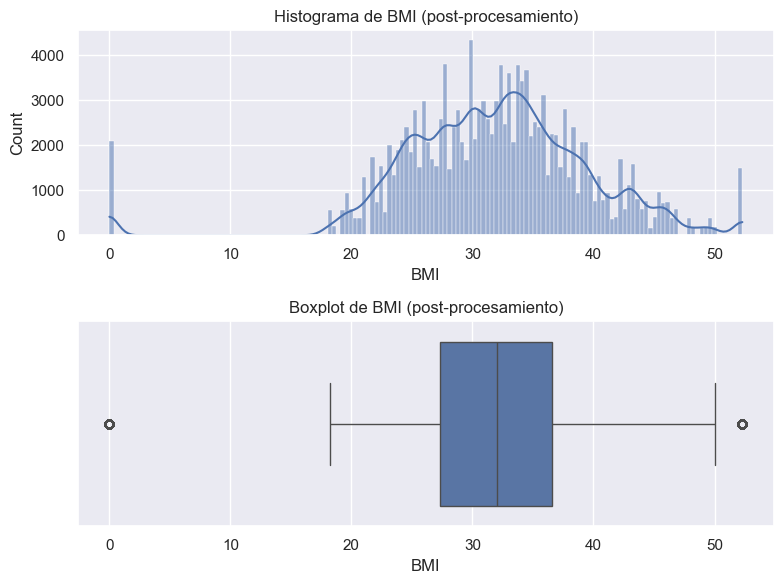

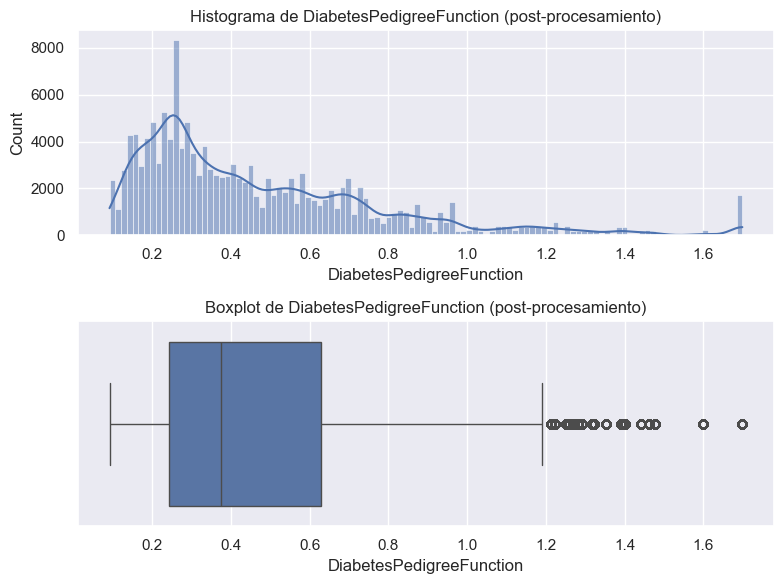

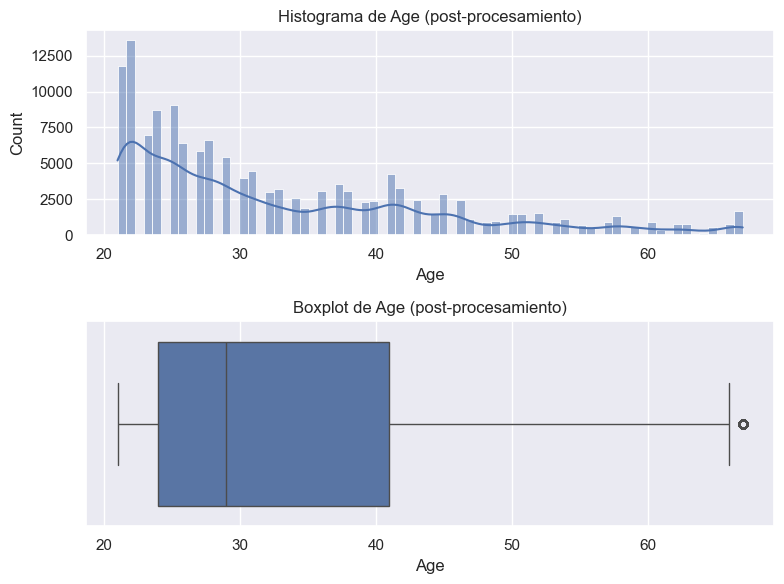

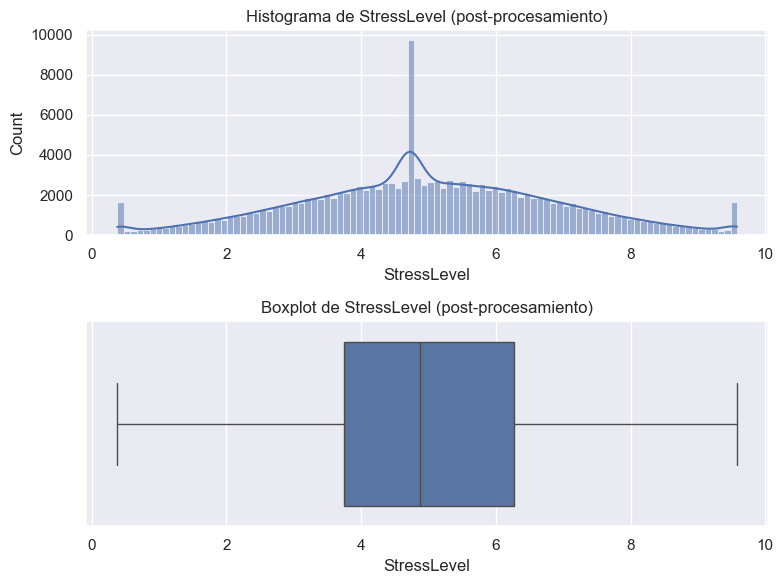

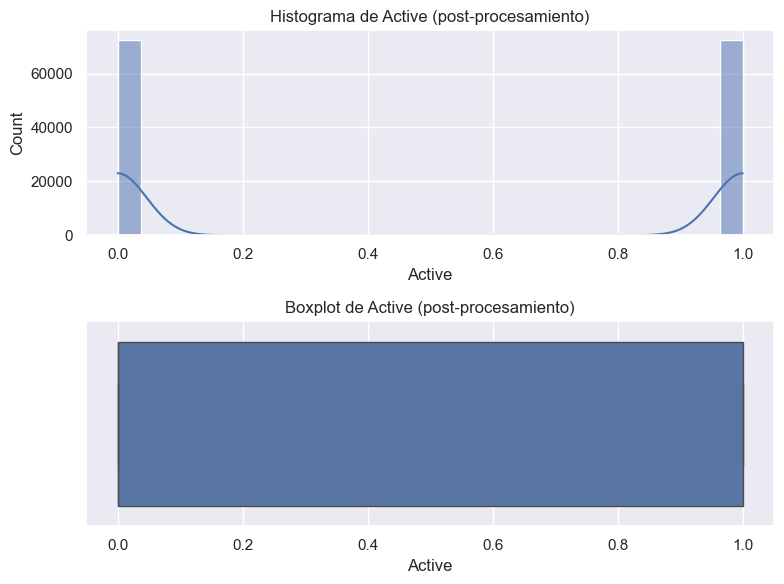

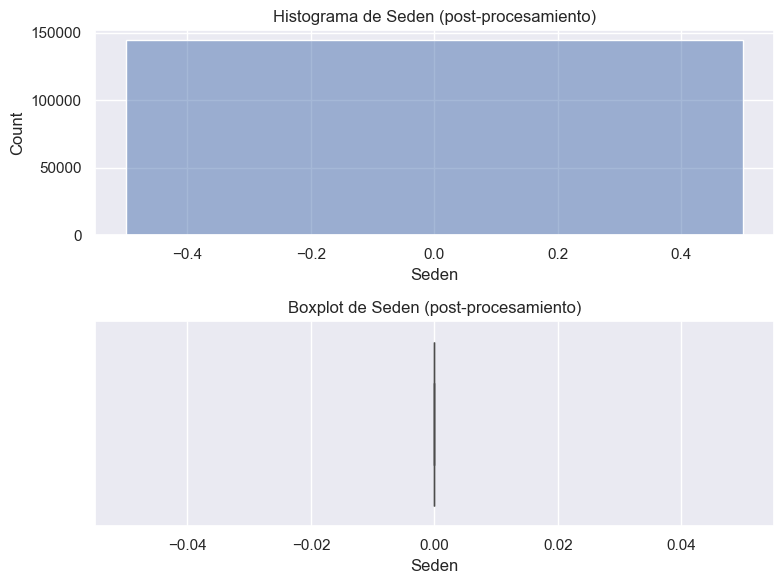

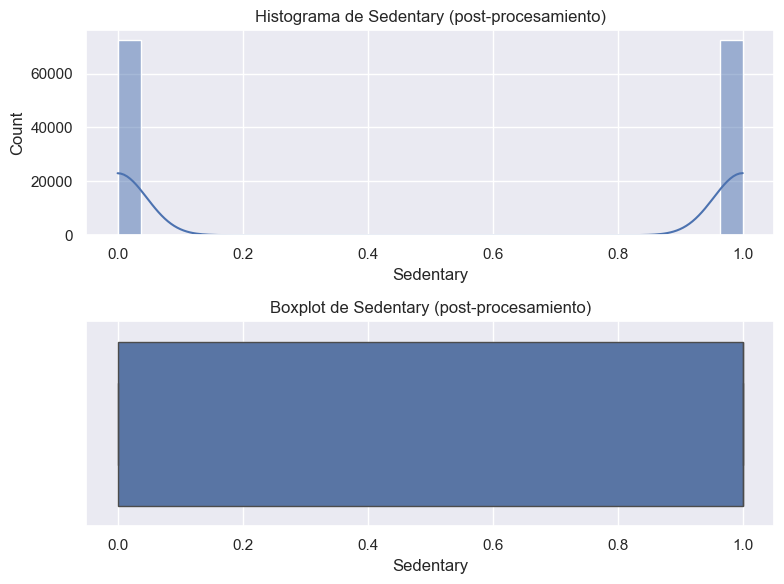

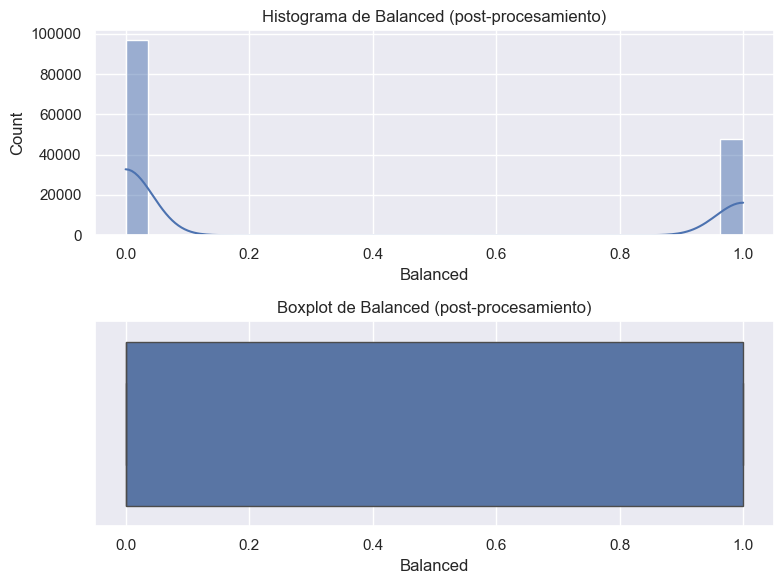

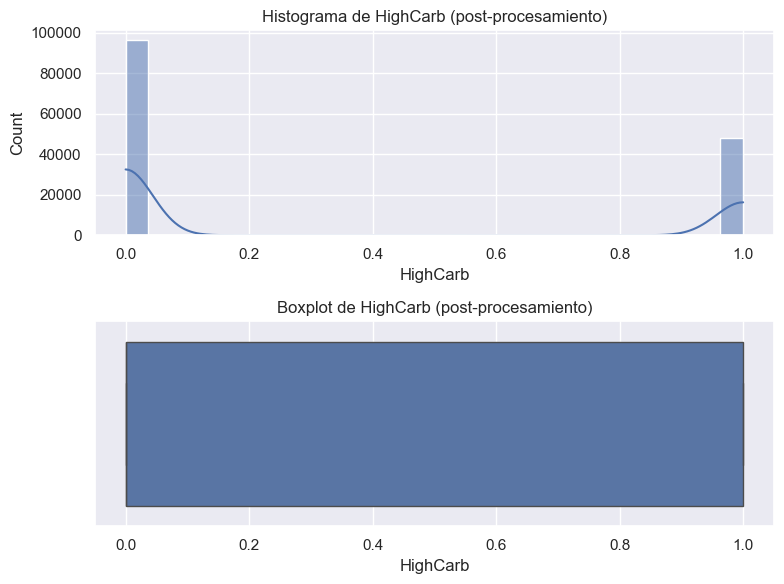

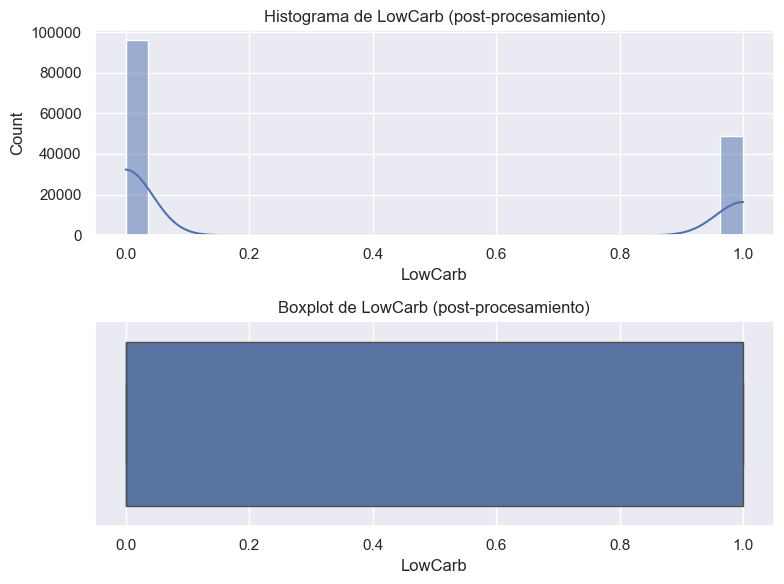

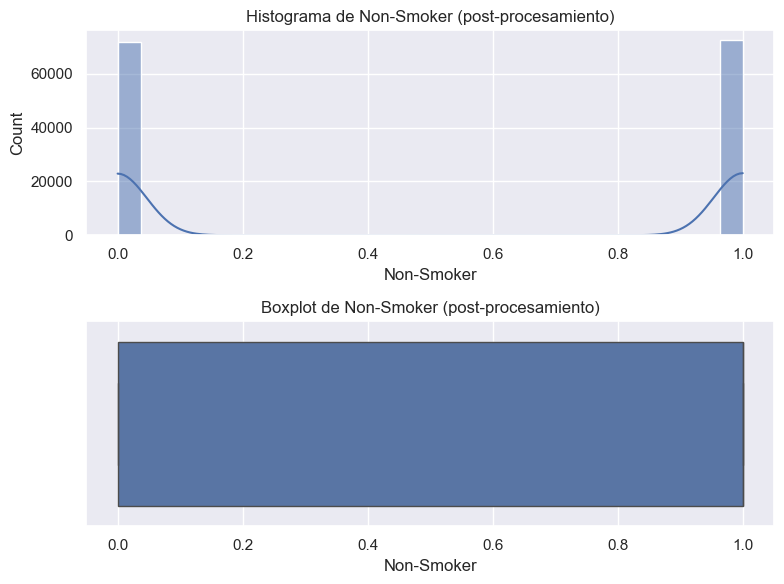

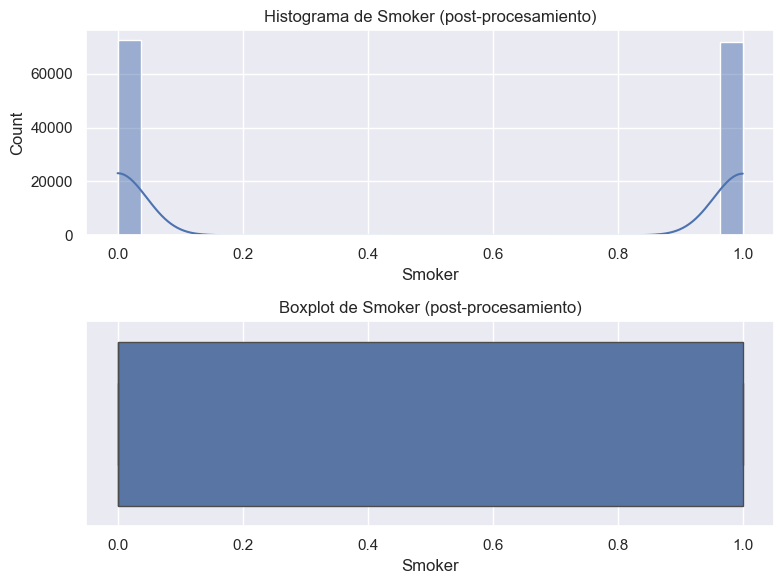

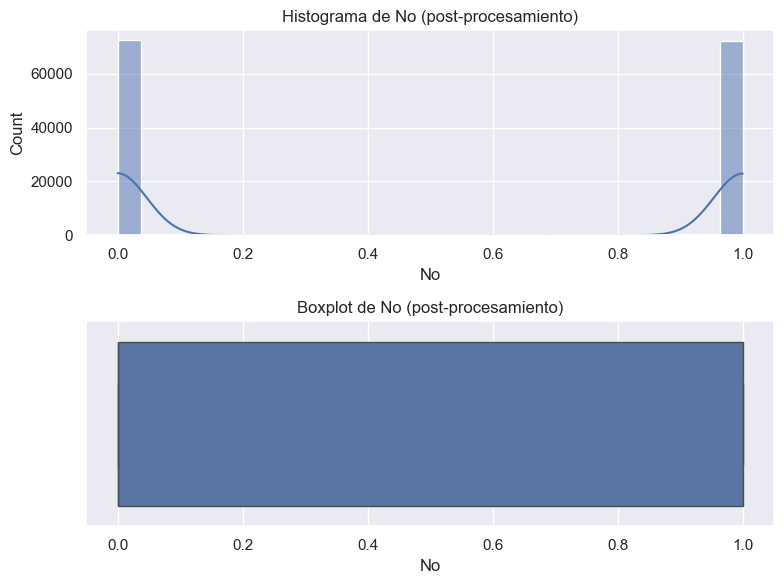

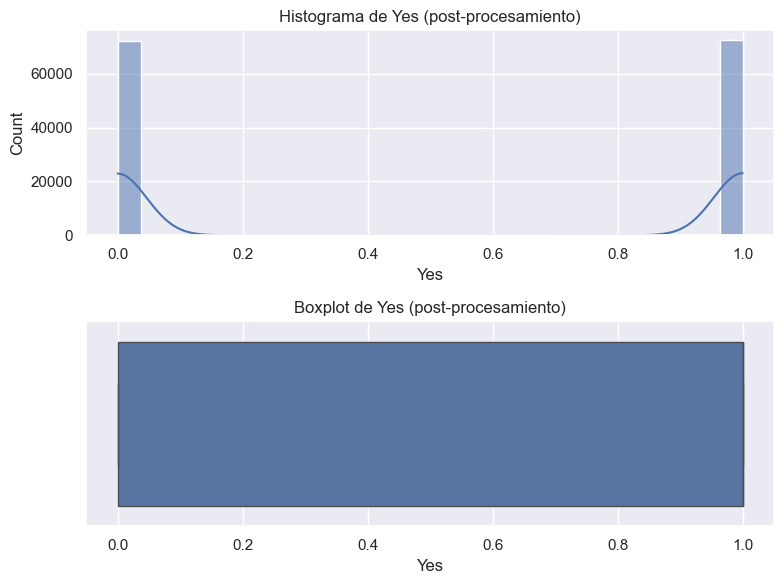

Preprocesamiento columna por columna finalizado. df -> df_proc -> df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144641 entries, 0 to 144640
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               144641 non-null  float64
 1   Glucose                   144641 non-null  float64
 2   BloodPressure             144641 non-null  float64
 3   SkinThickness             144641 non-null  float64
 4   Insulin                   144641 non-null  float64
 5   BMI                       144641 non-null  float64
 6   DiabetesPedigreeFunction  144641 non-null  float64
 7   Age                       144641 non-null  float64
 8   Outcome                   144641 non-null  int64  
 9   StressLevel               144641 non-null  float64
 10  Active                    144641 non-null  float64
 11  Seden                     144641 non-null  float64
 12  Sedentary                 14464

In [37]:

# ==================== PREPROCESAMIENTO COLUMNA POR COLUMNA ====================
# Basado en el estilo del notebook: imputación con SimpleImputer(strategy='most_frequent'),
# conversión numérica con errors='coerce', winsorización de extremos (1% por cola),
# y visualización con histogramas y boxplots. No se crean features nuevas ni se eliminan filas.

from sklearn.impute import SimpleImputer
from scipy.stats import mstats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataframe procesado independiente desde el df con dummies
df_proc = df.copy()

# Separar target si existe en columnas
target_col = 'Outcome' if 'Outcome' in df_proc.columns else None
if target_col is not None:
    y = df_proc[target_col]
else:
    y = None

print("Resumen inicial (df_proc):")
print(df_proc.info())
print(df_proc.head())
print("-"*100)

# Intento de conversión a numérico para columnas object/categoría que sean numéricas en texto
for col in df_proc.columns:
    if col == target_col:
        continue
    if df_proc[col].dtype == 'object':
        # Conversión tentativa a numérico
        before_na = df_proc[col].isna().sum()
        df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce')
        after_na = df_proc[col].isna().sum()
        print(f"[{col}] object -> numeric (coerce). NaN antes: {before_na}, después: {after_na}")

print("-"*100)
print("Tipos luego de convertir a numérico donde aplica:")
print(df_proc.dtypes)

# Imputación por moda para TODAS las columnas (como en el notebook), respetando estilo
# (el cuaderno usa 'most_frequent' para columnas problemáticas como 'ca' y 'thal'. Aquí generalizamos.)
imputer_mode = SimpleImputer(strategy='most_frequent')
cols_to_impute = [c for c in df_proc.columns if c != target_col]
df_proc[cols_to_impute] = imputer_mode.fit_transform(df_proc[cols_to_impute])

print("-"*100)
print("Después de imputación por moda:")
print(df_proc.isna().sum())

# Winsorización (1% por cola) para columnas numéricas (excepto la etiqueta)
num_cols = [c for c in df_proc.select_dtypes(include=[np.number]).columns if c != target_col]

for col in num_cols:
    # Registrar cuantiles antes
    q1, q99 = df_proc[col].quantile(0.01), df_proc[col].quantile(0.99)
    df_proc[col] = mstats.winsorize(df_proc[col], limits=[0.01, 0.01])
    print(f"[{col}] winsorize 1%-99% | q01={q1:.4f}, q99={q99:.4f}")

print("-"*100)
print("Descripción estadística post-winsorización:")
print(df_proc[num_cols].describe())

# Visualizaciones por columna numérica (histograma + boxplot)
for col in num_cols:
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df_proc[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Histograma de {col} (post-procesamiento)")
    sns.boxplot(x=df_proc[col], ax=ax[1])
    ax[1].set_title(f"Boxplot de {col} (post-procesamiento)")
    plt.tight_layout()
    plt.show()

# Reasignar df si quieres que el resto del notebook use el DataFrame procesado
df = df_proc.copy()

print("Preprocesamiento columna por columna finalizado. df -> df_proc -> df")
print(df.info())


# Modelos implementados

## 1. Perceptron

In [48]:
# === Base de datos y variable objetivo ===
import pandas as pd
import numpy as np

# Elegir df_base: df_clean si existe; si no, df
if 'df_clean' in globals():
    df_base = df_clean.copy()
elif 'df' in globals():
    df_base = df.copy()
else:
    raise NameError("No encuentro 'df' ni 'df_clean'. Carga primero tu DataFrame.")

# Elegir y_col automáticamente (prioriza 'Outcome')
candidatas = [c for c in df_base.columns 
              if c.lower() in ["outcome","target","class","label","y","objetivo"]]
y_col = "Outcome" if "Outcome" in df_base.columns else (candidatas[0] if candidatas else None)

if y_col is None:
    raise ValueError("No pude detectar la columna objetivo. Define manualmente y_col = 'TU_COLUMNA'.")

print("Usando y_col:", y_col)

# Separar X e y
X = df_base.drop(columns=[y_col])
y = df_base[y_col]

# Si y es booleana/strings, convertir a 0/1 cuando sea posible
if y.dtype == 'O' or str(y.dtype).startswith('category') or y.dtype == bool:
    y_lower = y.astype(str).str.lower()
    mapas = [
        ({"yes":1,"no":0}, {"si":1,"no":0}),
        ({"true":1,"false":0},),
        ({"positivo":1,"negativo":0},),
        ({"1":1,"0":0},),
    ]
    mapped = None
    for grupo in mapas:
        for m in grupo:
            if set(y_lower.unique()) >= set(m.keys()):
                mapped = y_lower.map(m)
                break
        if mapped is not None:
            break
    if mapped is not None:
        y = mapped.astype(int)
        print("Se mapeó y a {0,1}.")
    else:
        print("Aviso: y es categórica con valores:", y.unique())


Usando y_col: Outcome


In [61]:
# === Reconstrucción de columnas + limpieza de y ===
import numpy as np
import pandas as pd

# Columnas por tipo (sobre X actual)
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")

# Quitar filas donde la y esté NaN (modelo no puede entrenar con y faltante)
mask_y_ok = ~pd.isna(y)
dropped_y = (~mask_y_ok).sum()
if dropped_y > 0:
    print(f"Se eliminaron {dropped_y} filas por y NaN.")
X = X.loc[mask_y_ok].reset_index(drop=True)
y = y.loc[mask_y_ok].reset_index(drop=True)


Numéricas: 9 | Categóricas: 4


In [64]:
# === Split + Preprocesamiento con IMPUTACIÓN ===
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Split 70/30 (estratificado si es binario/multiclase)
stratify_arg = y if y.nunique() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=stratify_arg
)

# Pipelines de preprocesamiento por tipo
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Compatibilidad con versiones de sklearn (sparse_output vs sparse)
try:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", cat_enc),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)


In [65]:
# === Perceptrón en Pipeline (con imputación integrada) ===
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

perc = Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=1e-3,
    shuffle=True,
    eta0=0.1,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    random_state=42
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", perc),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.671

Matriz de confusión:
 [[27302  7398]
 [ 6878  1815]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79     34700
           1       0.20      0.21      0.20      8693

    accuracy                           0.67     43393
   macro avg       0.50      0.50      0.50     43393
weighted avg       0.68      0.67      0.67     43393



In [72]:
# === RESUMEN DEL CONJUNTO DE PRUEBA Y OBJETIVO ===
import pandas as pd
import numpy as np
from collections import Counter

print(f"🔎 Variable objetivo analizada (y_col): {y_col}")

print(f"Tamaño train: {len(y_train):,} | test: {len(y_test):,} | total: {len(y_train)+len(y_test):,}")

def distr(y, nombre):
    c = Counter(y)
    tot = len(y)
    filas = [{"clase": k, "conteo": v, "porc": f"{v/tot: .2%}"} for k, v in sorted(c.items(), key=lambda kv: kv[0])]
    df_ = pd.DataFrame(filas)
    print(f"\nDistribución de clases en {nombre}:")
    display(df_)

distr(y_train, "TRAIN")
distr(y_test, "TEST")

# Columnas originales usadas
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Features numéricas ({len(num_cols)}): {num_cols[:10]}{' ...' if len(num_cols)>10 else ''}")
print(f"Features categóricas ({len(cat_cols)}): {cat_cols[:10]}{' ...' if len(cat_cols)>10 else ''}")


🔎 Variable objetivo analizada (y_col): Outcome
Tamaño train: 101,248 | test: 43,393 | total: 144,641

Distribución de clases en TRAIN:


,clase,conteo,porc
0,0,80966,79.97%
1,1,20282,20.03%



Distribución de clases en TEST:


,clase,conteo,porc
0,0,34700,79.97%
1,1,8693,20.03%


Features numéricas (9): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'StressLevel']
Features categóricas (4): ['Lifestyle', 'DietType', 'SmokingStatus', 'FamilyHistory']


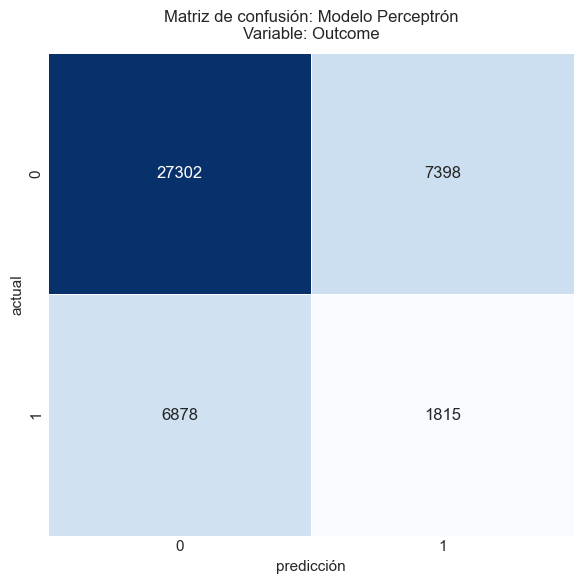

In [73]:
# === MATRIZ DE CONFUSIÓN ESTILO "CUADRÍCULA LIMPIA" ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Si quieres renombrar clases (ejemplo para binario):
# label_map = {0: "negativo", 1: "positivo"}
# y_test_plot = pd.Series(y_test).map(label_map).fillna(y_test).values
# y_pred_plot = pd.Series(y_pred).map(label_map).fillna(y_pred).values

y_test_plot = y_test
y_pred_plot = y_pred
clases = np.unique(y_test_plot)

cm = confusion_matrix(y_test_plot, y_pred_plot, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')

ax.set_xlabel("predicción", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusión: Modelo Perceptrón\nVariable: {y_col}", fontsize=12, pad=10)

# cuadrícula suave
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


Métrica,Valor
Accuracy,0.6710
Error (1-Acc),0.3290
TPR / Recall,0.2088
FPR,0.2132
Especificidad (TNR),0.7868
Precision (PPV),0.1970
NPV,0.7988
F1-score,0.2027
Prevalencia P(Y=1),0.2003
Balanced Accuracy,0.4978



Componentes (pos_label = 1):


,Pred 0,Pred 1
Real 0,27302,7398
Real 1,6878,1815


,precision,recall,f1-score,support
0,0.7988,0.7868,0.7927,34700.0000
1,0.1970,0.2088,0.2027,8693.0000
accuracy,0.6710,0.6710,0.6710,0.6710
macro avg,0.4979,0.4978,0.4977,43393.0000
weighted avg,0.6782,0.6710,0.6745,43393.0000


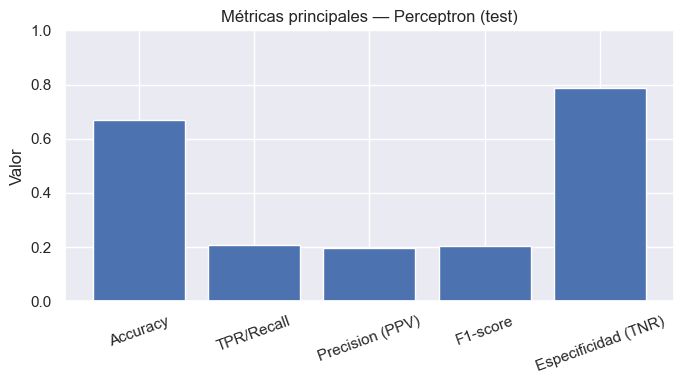

In [77]:
# === MÉTRICAS COMPLETAS Y LIMPIAS ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, matthews_corrcoef
)

# ----- Config: etiqueta positiva para binario -----
classes = np.unique(y_test)
# Si existe la clase 1 la tomamos como positiva; si no, la mayor
pos_label = 1 if 1 in classes else classes.max()

# ----- Confusion matrix -----
cm = confusion_matrix(y_test, y_pred, labels=classes)

def metrics_binary(y_true, y_hat, pos_label):
    # Re-etiquetar a binario (pos_label vs resto) si hay más de 2 clases
    if len(np.unique(y_true)) > 2:
        y_true_bin = (pd.Series(y_true).values == pos_label).astype(int)
        y_hat_bin  = (pd.Series(y_hat ).values == pos_label).astype(int)
    else:
        y_true_bin = pd.Series(y_true).values
        y_hat_bin  = pd.Series(y_hat ).values

    tn, fp, fn, tp = confusion_matrix(y_true_bin, y_hat_bin, labels=[0,1]).ravel()
    total = tn + fp + fn + tp

    acc   = accuracy_score(y_true_bin, y_hat_bin)
    error = 1 - acc
    tpr   = tp / (tp + fn) if (tp + fn) > 0 else 0.0       # Recall / Sensibilidad
    fpr   = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tnr   = tn / (tn + fp) if (tn + fp) > 0 else 0.0       # Especificidad
    ppv   = precision_score(y_true_bin, y_hat_bin, zero_division=0)  # Precision
    npv   = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    f1    = f1_score(y_true_bin, y_hat_bin, zero_division=0)
    prev  = (tp + fn) / total if total > 0 else 0.0        # Prevalencia positiva
    bacc  = (tpr + tnr) / 2
    mcc   = matthews_corrcoef(y_true_bin, y_hat_bin) if total > 0 else 0.0

    # AUC si hay score disponible
    auc = None
    try:
        if 'pipe' in globals():
            # Preferimos decision_function; si no, probas
            if hasattr(pipe, "decision_function"):
                s = pipe.decision_function(X_test)
                score = s if s.ndim == 1 else s[:, list(classes).index(pos_label)]
            elif hasattr(pipe, "predict_proba"):
                proba = pipe.predict_proba(X_test)
                score = proba[:, list(classes).index(pos_label)] if proba.ndim == 2 else proba
            else:
                score = None
            if score is not None:
                auc = roc_auc_score(y_true_bin, score)
    except Exception:
        pass

    return {
        "TN": tn, "FP": fp, "FN": fn, "TP": tp, "Total": total,
        "Accuracy": acc, "Error": error, "TPR/Recall": tpr, "FPR": fpr,
        "Especificidad (TNR)": tnr, "Precision (PPV)": ppv, "NPV": npv,
        "F1-score": f1, "Prevalencia (P(Y=1))": prev, "Balanced Acc.": bacc,
        "MCC": mcc, "AUC": auc
    }

bin_metrics = metrics_binary(y_test, y_pred, pos_label)

# ----- Tabla “resumen ejecutivo” -----
filas = [
    ("Accuracy",                 bin_metrics["Accuracy"]),
    ("Error (1-Acc)",            bin_metrics["Error"]),
    ("TPR / Recall",             bin_metrics["TPR/Recall"]),
    ("FPR",                      bin_metrics["FPR"]),
    ("Especificidad (TNR)",      bin_metrics["Especificidad (TNR)"]),
    ("Precision (PPV)",          bin_metrics["Precision (PPV)"]),
    ("NPV",                      bin_metrics["NPV"]),
    ("F1-score",                 bin_metrics["F1-score"]),
    ("Prevalencia P(Y=1)",       bin_metrics["Prevalencia (P(Y=1))"]),
    ("Balanced Accuracy",        bin_metrics["Balanced Acc."]),
    ("MCC",                      bin_metrics["MCC"]),
    ("AUC (si aplica)",          bin_metrics["AUC"]),
]
resumen_df = pd.DataFrame(filas, columns=["Métrica", "Valor"])
display(resumen_df.style.format({"Valor": "{:.4f}"}).hide(axis="index"))

# ----- Componentes de la matriz de confusión -----
cm_df = pd.DataFrame(
    [[bin_metrics["TN"], bin_metrics["FP"]],
     [bin_metrics["FN"], bin_metrics["TP"]]],
    index=["Real 0", "Real 1"],
    columns=["Pred 0", "Pred 1"]
)
print(f"\nComponentes (pos_label = {pos_label}):")
display(cm_df)

# ----- Tabla por clase (macro/weighted incluidas) -----
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
por_clase = pd.DataFrame(report).T
display(por_clase.style.format("{:.4f}"))

# ====== (Opcional) Gráfico rápido de barras con las métricas principales ======
try:
    import matplotlib.pyplot as plt

    claves = ["Accuracy","TPR/Recall","Precision (PPV)","F1-score","Especificidad (TNR)"]
    vals   = [bin_metrics[k] for k in claves]

    plt.figure(figsize=(7,4))
    plt.bar(claves, vals)
    plt.ylim(0, 1)
    plt.title(f"Métricas principales — {getattr(pipe.named_steps['clf'], '__class__', type('x',(),{}) ).__name__} (test)")
    plt.ylabel("Valor")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
except Exception:
    pass


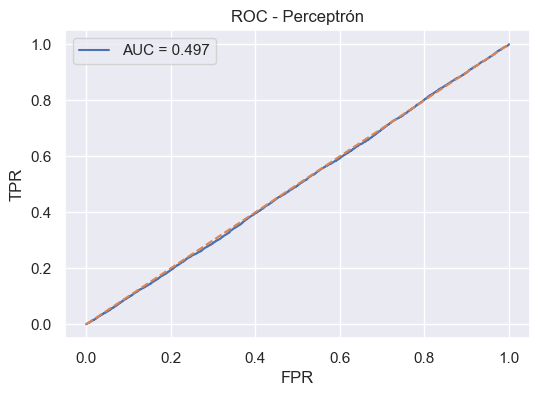

In [70]:
# === Curva ROC / AUC (solo binario) ===
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

clases = np.unique(y_test)
if len(clases) == 2:
    y_score = pipe.decision_function(X_test)
    fpr, tpr, thr = roc_curve(y_test, y_score, pos_label=clases.max())
    auc = roc_auc_score(y_test, y_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC - Perceptrón")
    plt.legend()
    plt.show()
else:
    print("ROC/AUC omitido: y no es binaria.")


## 2. Adaline

In [90]:
# === Selección de df_base e y_col (solo si no lo tienes arriba) ===
import pandas as pd, numpy as np

if 'df_clean' in globals():
    df_base = df_clean.copy()
elif 'df' in globals():
    df_base = df.copy()
else:
    raise NameError("No encuentro df ni df_clean.")

# Detectar y_col (prioriza Outcome)
candidatas = [c for c in df_base.columns if c.lower() in ["outcome","target","class","label","y","objetivo"]]
y_col = "Outcome" if "Outcome" in df_base.columns else (candidatas[0] if candidatas else None)
assert y_col is not None, "Define y_col manualmente."

X = df_base.drop(columns=[y_col])
y = df_base[y_col]

# Limpiar y NaN
ok = ~pd.isna(y); X, y = X.loc[ok], y.loc[ok]

# Tipos
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Split + Preprocess con imputación
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y if y.nunique()>1 else None
)

num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                     ("scaler", StandardScaler())])
try:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                     ("onehot", cat_enc)])

preprocess = ColumnTransformer(
    [("num", num_pipe, num_cols),
     ("cat", cat_pipe, cat_cols)],
    remainder="drop"
)


In [91]:
# === ADALINE (pérdida cuadrática) en Pipeline ===
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

adaline = SGDClassifier(
    loss="squared_error",   # clave: pérdida cuadrática (ADALINE)
    penalty=None,           # sin regularización al inicio (prueba 'l2' si hay overfit)
    learning_rate="constant",
    eta0=0.01,              # tasa de aprendizaje (ajústala si diverge/mejora lento)
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

pipe_adaline = Pipeline([
    ("prep", preprocess),
    ("clf", adaline),
])

pipe_adaline.fit(X_train, y_train)
y_pred_adaline = pipe_adaline.predict(X_test)


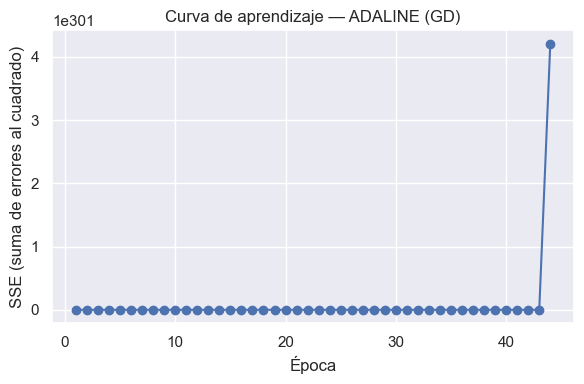

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses)+1), losses, marker="o")
plt.xlabel("Época")
plt.ylabel("SSE (suma de errores al cuadrado)")
plt.title("Curva de aprendizaje — ADALINE (GD)")
plt.tight_layout(); plt.show()


In [92]:
# === Evaluación ADALINE ===
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np, pandas as pd

print("Accuracy (ADALINE):", round(accuracy_score(y_test, y_pred_adaline), 4))
print("\nReporte de clasificación (ADALINE):\n",
      classification_report(y_test, y_pred_adaline, zero_division=0))

# Matriz de confusión explicativa (como la versión “limpia”)
cm = confusion_matrix(y_test, y_pred_adaline)
cm_df = pd.DataFrame(cm,
    index=[f"Real {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)
display(cm_df)

# Curva ROC / AUC si el problema es binario
clases = np.unique(y_test)
if len(clases)==2:
    # Para ADALINE, hay scores lineales:
    scores = pipe_adaline.decision_function(X_test)
    auc = roc_auc_score(y_test, scores)
    print(f"AUC (ADALINE): {auc:.4f}")


Accuracy (ADALINE): 0.7831

Reporte de clasificación (ADALINE):
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     34700
           1       0.20      0.03      0.05      8693

    accuracy                           0.78     43393
   macro avg       0.50      0.50      0.46     43393
weighted avg       0.68      0.78      0.71     43393



,Pred 0,Pred 1
Real 0,33743,957
Real 1,8454,239


AUC (ADALINE): 0.4980


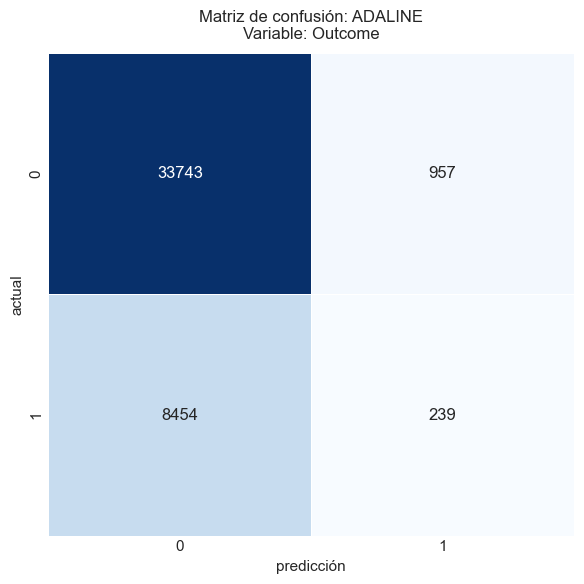

In [93]:
# === Matriz de confusión visual (estilo ejemplo) ===
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix

clases = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_adaline, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')
ax.set_xlabel("predicción", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusión: ADALINE\nVariable: {y_col}", fontsize=12, pad=10)
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


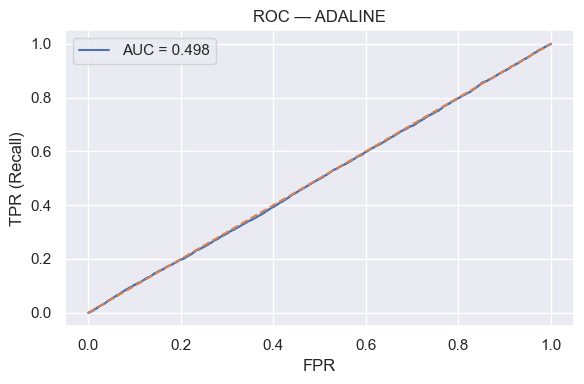

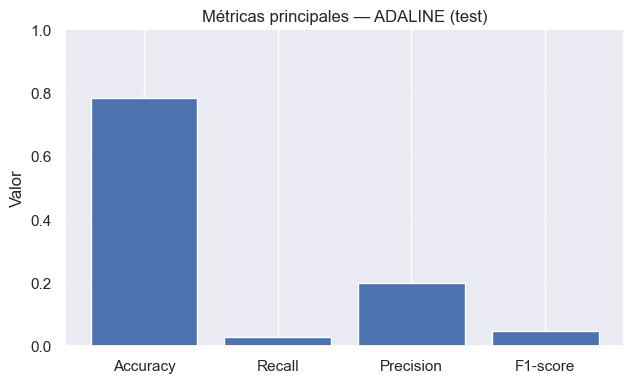

In [94]:
# === ROC/AUC (binario) + barras de métricas clave ===
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if len(np.unique(y_test))==2:
    scores = pipe_adaline.decision_function(X_test)
    fpr, tpr, thr = roc_curve(y_test, scores, pos_label=max(np.unique(y_test)))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, scores):.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC — ADALINE")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Barras (Accuracy, Recall, Precision, F1) sobre ADALINE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
vals = {
    "Accuracy":  accuracy_score(y_test, y_pred_adaline),
    "Recall":    recall_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
    "Precision": precision_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
    "F1-score":  f1_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
}
plt.figure(figsize=(6.5,4))
plt.bar(list(vals.keys()), list(vals.values()))
plt.ylim(0,1)
plt.title("Métricas principales — ADALINE (test)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [95]:
# === MÉTRICAS COMPLETAS — ADALINE (GD) ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, matthews_corrcoef
)

# --- Configurar etiqueta positiva ---
classes = np.unique(y_test)
pos_label = 1 if 1 in classes else classes.max()

def binariza(y, pos):
    y = pd.Series(y).values
    return (y == pos).astype(int)

# --- Confusion matrix (multiclase y binario) ---
cm = confusion_matrix(y_test, y_pred_adaline, labels=classes)
cm_df = pd.DataFrame(cm,
                     index=[f"Real {c}" for c in classes],
                     columns=[f"Pred {c}" for c in classes])
print("Matriz de confusión (ADALINE GD):")
display(cm_df)

# --- Métricas por clase y promedios (macro/weighted) ---
print("\nReporte de clasificación (ADALINE GD):")
rep_dict = classification_report(y_test, y_pred_adaline, output_dict=True, zero_division=0)
display(pd.DataFrame(rep_dict).T.style.format("{:.4f}"))

# --- Métricas binarias principales para la clase positiva (pos_label) ---
y_true_bin = binariza(y_test, pos_label)
y_pred_bin = binariza(y_pred_adaline, pos_label)

tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1]).ravel()
total = tn + fp + fn + tp

acc   = accuracy_score(y_true_bin, y_pred_bin)
error = 1 - acc
tpr   = tp / (tp + fn) if (tp + fn)>0 else 0.0     # Recall / Sensibilidad
fpr   = fp / (fp + tn) if (fp + tn)>0 else 0.0
tnr   = tn / (tn + fp) if (tn + fp)>0 else 0.0     # Especificidad
ppv   = precision_score(y_true_bin, y_pred_bin, zero_division=0)  # Precisión
npv   = tn / (tn + fn) if (tn + fn)>0 else 0.0
f1    = f1_score(y_true_bin, y_pred_bin, zero_division=0)
prev  = (tp + fn) / total if total>0 else 0.0
bacc  = (tpr + tnr) / 2
mcc   = matthews_corrcoef(y_true_bin, y_pred_bin) if total>0 else 0.0

# AUC con scores continuos si están disponibles
auc = None
if 'scores_te' in globals() and scores_te is not None:
    try:
        auc = roc_auc_score(y_true_bin, scores_te)
    except Exception:
        auc = None

# --- Tabla resumen ejecutiva ---
resumen = pd.DataFrame([
    ("Accuracy",                 acc),
    ("Error (1-Acc)",            error),
    ("TPR / Recall",             tpr),
    ("FPR",                      fpr),
    ("Especificidad (TNR)",      tnr),
    ("Precision (PPV)",          ppv),
    ("NPV",                      npv),
    ("F1-score",                 f1),
    ("Prevalencia P(Y=1)",       prev),
    ("Balanced Accuracy",        bacc),
    ("MCC",                      mcc),
    ("AUC (si hay scores)",      auc),
], columns=["Métrica", "Valor"])

print(f"\nClase positiva considerada: {pos_label}")
display(resumen.style.format({"Valor": lambda v: "—" if v is None else f"{v:.4f}"}).hide(axis="index"))

# --- Mini tabla TN/FP/FN/TP ---
comp = pd.DataFrame([[tn, fp],[fn, tp]], index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"])
print("Componentes TN/FP/FN/TP:")
display(comp)


Matriz de confusión (ADALINE GD):


,Pred 0,Pred 1
Real 0,33743,957
Real 1,8454,239



Reporte de clasificación (ADALINE GD):


,precision,recall,f1-score,support
0,0.7997,0.9724,0.8776,34700.0000
1,0.1998,0.0275,0.0483,8693.0000
accuracy,0.7831,0.7831,0.7831,0.7831
macro avg,0.4997,0.5000,0.4630,43393.0000
weighted avg,0.6795,0.7831,0.7115,43393.0000



Clase positiva considerada: 1


Métrica,Valor
Accuracy,0.7831
Error (1-Acc),0.2169
TPR / Recall,0.0275
FPR,0.0276
Especificidad (TNR),0.9724
Precision (PPV),0.1998
NPV,0.7997
F1-score,0.0483
Prevalencia P(Y=1),0.2003
Balanced Accuracy,0.5000


Componentes TN/FP/FN/TP:


,Pred 0,Pred 1
Real 0,33743,957
Real 1,8454,239
